# Lab 1: 
### TA : Hisham Ashraf Amer 

#### Date : 19/10/2020

1. Build our first quantum circuits using Qiskit.

2. Introduce the Quantum information Module.

3. Building Multiqubit Operators to manipulate statevectors using the module.

4. Build a Bell state and visualize its measurement and elaborate on maximally entangled states.

5. Introduce the GHZ state, and build a quantum circuit for a 4-Qubit GHZ state and run it on IMB's quantum Computer Simulator.

6. Assess the Density matrices of GHZ states on Qiskit from an actual run on an IBM quantum computer, so we will see the effect of noise and decoherence on the density matrix of states resulting from real circuits.

7. Very quickly discuss the concept behind one very promising application of quantum computers, Variational Quantum Eigen-solvers, which we will build in a later lab session.

# 1.0 : Intro to Circuit construction, visualization and measurments:

### 1.1 : Building our fist circuit and identifying the statevector:

In [1]:
## importing the required packages

from qiskit import *
import numpy as np

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

'''initializing the circuit with 2 qubits in the quantum register and 2 in 
the classical register and their quantum circuit'''

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
circ = QuantumCircuit(qr, cr)

## add gates to the quantum circuit 

circ.x(qr[0])
circ.cx(qr[0], qr[1])
circ.measure(qr[0], cr[0])
circ.measure(qr[1], cr[1])

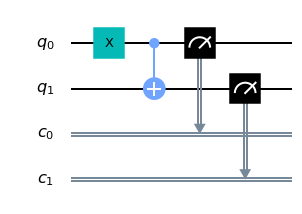

In [3]:
## printing out the circuit in the matplotlib format

circ.draw(output='mpl',cregbundle=False)

In [4]:
'''choose a simulator to work on, we will use the statevector backend from the Qiskit Aer package and save it 
in the S_simulator variable ''' 

S_simulator = Aer.get_backend('statevector_simulator')

## now to execute the circuit, using the execute function and after it runs we can store the results using "result" fucntion
rslt = execute(circ, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()

In [5]:
print(My_statevector)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [6]:
## This is to emphasize the statevector is a numpy array

print(type(My_statevector))

<class 'numpy.ndarray'>


### 1.2 : Task .... Find a circuit that generates the singlet state:

In [7]:
##initializing the circuit with 2 qubits in the quantum register and 2 in the classical register

qr = QuantumRegister(2,'q0')
cr = ClassicalRegister(2,'c0')
circ = QuantumCircuit(qr,cr)

## specifying the gates needed for the singlet state
#first the x-gate on qubit 1 so that when we act on it with a hadamard later we get a negative
#infront of the |1> 

circ.x(qr[0])
circ.barrier()  ## barrier just for visual convenience 

## a hadamard gate on qubit 1 to put it in a superposition
circ.h(qr[0])
circ.barrier()

## a cnot gate with qubit 1 as control and qubit 2 as target
circ.cx(qr[0], qr[1])
circ.barrier()


circ.x(qr[1])
circ.barrier()

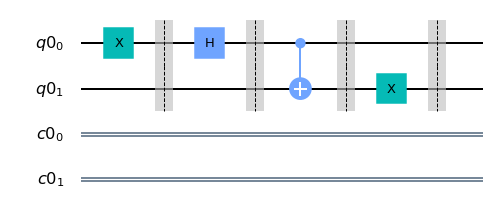

In [8]:
## printing out the circuit in the matplotlib format

circ.draw(output='mpl',cregbundle=False)

In [9]:
## adding measurements from qubit 1 and 2 to classical register bits c1 and c2  
circ.measure(qr,cr)

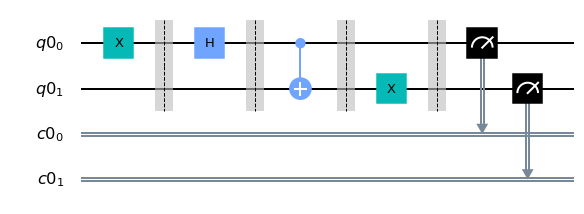

In [10]:
circ.draw(output='mpl',cregbundle=False)

### 1.3 : Qasm Simulator, measurements and counts:

In [11]:
## specifying the simulator, we will use the Qasm simulator form the Aer Qiskit package

sim = Aer.get_backend('qasm_simulator')

#############################################

In [12]:
## run the circuit 'circ' on the Qasm simulator 'sim' storing the results in the "rslt" object
rslt = execute(circ, backend = sim).result()

In [13]:
#for informative visualization of results we can use qiskit visualization tools but first need
# to import the required tool:

from qiskit.tools.visualization import plot_histogram

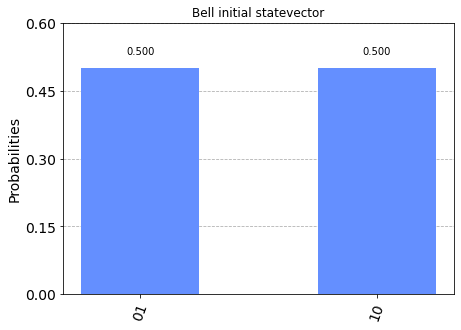

In [14]:
## plotting a histogram of the measurements made by the circuit

plot_histogram(rslt.get_counts(circ),title="Bell initial statevector")

In [15]:
## another circuit just to show how one can get the state vector resulting from the circuit
##(before measurments)


q = QuantumRegister(2,'q') 
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q, c)


## specifying the gates needed for the singlet state (same circuit as before)

qc.x(q[0])
qc.barrier()
qc.h(q[0])
qc.barrier()
qc.cx(q[0], q[1])
qc.barrier()
qc.x(q[1])


## this time we use the Statevector Simulator istead of Qasm, since we need the statevector

backend = Aer.get_backend('statevector_simulator')
result = qiskit.execute(qc, backend=backend).result()


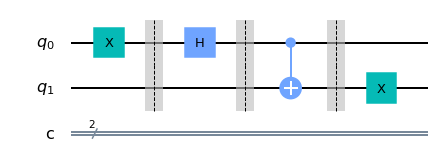

In [16]:

## obviosuly the same circuit but without the measurment step

qc.draw(output = 'mpl')

In [17]:
## the state vector results were stored in 'output' so we print them out we clearly see the
#amplitude of every basis state and it's 0 for the first and last basis vector and -1/sqrt 2 for 
#the |01> and +1/sqrt 2 for |01>  (remember Qiskit reverses order of qubits) which 
#corresponds to a singlet state.

rslt = execute(qc, backend = S_simulator).result()
## extract the statevector from all the different result options using the "get_statevector" function
My_statevector = rslt.get_statevector()
print(My_statevector)

[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


In [18]:
print(type(circ))
print(type(My_statevector))

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
<class 'numpy.ndarray'>


### 1.4 :  What if I want to visualize a bloch sphere of some single qubit state :


#### a. Using a quantum circuit to generate the state:

In [19]:
## import the plot bloch vector function from Qiksit 

from qiskit.tools.visualization import plot_bloch_multivector

# setup a circuit to generate a single qubiit state

circ = QuantumCircuit(1,1)
circ.x(0)
S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(circ, backend = S_simulator).result()
My_statevector = rslt.get_statevector()

print(My_statevector)


[0.+0.j 1.+0.j]


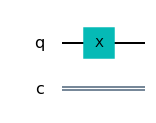

In [20]:
## this means that the X-gate appied on state |0> =|1>
circ.draw(output='mpl')

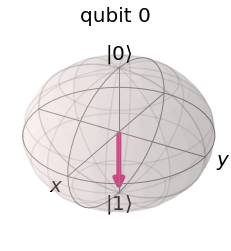

In [21]:
## given a statevector we can plot it on a bloch sphere
plot_bloch_multivector(My_statevector)


#### b. Using a random state generator:

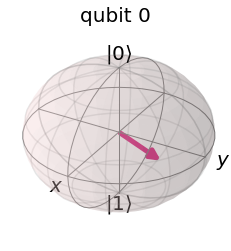

In [22]:
from qiskit.quantum_info import random_statevector
our_random_statevector =random_statevector(2, seed=None)
plot_bloch_multivector(our_random_statevector)


In [23]:
print(our_random_statevector)

Statevector([0.63847344-0.45522157j, 0.58176901+0.21603193j],
            dims=(2,))


#### c. Input your own single qubit state as an array:


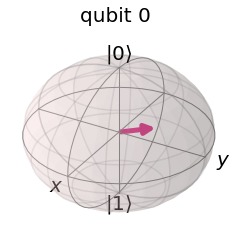

In [24]:
My_statevector_2 = np.array([0.5, -np.sqrt(3)/2])
plot_bloch_multivector(My_statevector_2)

### 1.5 : Task ...generate the state 'r' ie. y+ :

#### there are several ways for example:
#### a. We can just plugin the statevector since we are already familiar with it:

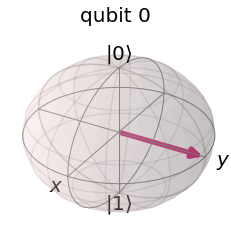

In [25]:
My_statevector_3 = np.array([0.707, 0.0+0.707j])
plot_bloch_multivector(My_statevector_3)

#### b. Use a circuit initialized to the '0' state, and rotate it around the x-axis by pi/2 :

In [36]:
# setup a circuit to generate a single qubiit state

circ = QuantumCircuit(1,1)
circ.rx(np.pi/2,0)
circ.rz(np.pi,0)

S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(circ, backend = S_simulator).result()
My_statevector = rslt.get_statevector()

print(My_statevector)


[7.07106781e-01+0.j         4.32978028e-17+0.70710678j]


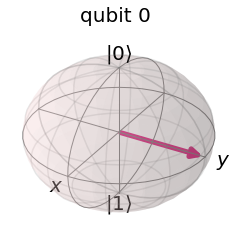

In [37]:
plot_bloch_multivector(My_statevector)

# 2.0 : Some functions from Qiskit's Quantum_info Package:

In [28]:
Pauli(label='II') ## won't work so what do we do ? .. import the required pachages !!!

NameError: name 'Pauli' is not defined

### 2.1 : Building operators :

### Initiating Pauli Strings ex: XX + ZZ + II

In [38]:
## import the required pauli matrices and operator packages from the quantum info module:

from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate, HGate, U2Gate, IGate

In [39]:
a= Pauli(label='II');

In [40]:
type(a)

qiskit.quantum_info.operators.pauli.Pauli

In [41]:
pauli_dict = {
"II" : Operator(Pauli(label='II')),
"XX" : Operator(Pauli(label='XX')),
"YY" : Operator(Pauli(label='YY')),
"ZZ" : Operator(Pauli(label='ZZ')),
"XI" : Operator(Pauli(label='XI')),
"IX" : Operator(Pauli(label='IX')),
"YI" : Operator(Pauli(label='YI')),
"IY" : Operator(Pauli(label='IY')),
"IZ" : Operator(Pauli(label='IZ')),
"ZI" : Operator(Pauli(label='ZI')),
"XZ" : Operator(Pauli(label='XZ')),
"ZX" : Operator(Pauli(label='ZX')),
"YZ" : Operator(Pauli(label='YZ')),
"ZY" : Operator(Pauli(label='ZY')),
"XY" : Operator(Pauli(label='XY')),
"YX" : Operator(Pauli(label='YX')),
}


In [33]:
pauli_dict['ZZ'].data

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [34]:
My_puali_string = pauli_dict['ZZ']+pauli_dict['YX']+pauli_dict['II']
My_puali_string

Operator([[2.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 2.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [35]:
from qiskit.aqua.algorithms import NumPyEigensolver
from qiskit.quantum_info import Statevector

In [36]:
print(Statevector.from_label('00').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('01').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('10').evolve(pauli_dict['ZZ']))
print(Statevector.from_label('11').evolve(pauli_dict['ZZ']))


Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
            dims=(2, 2))
Statevector([ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


### Input your own NumPy array for the matrix of the operator

In [37]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Translate a Gate into a matrix operator

In [39]:
from qiskit.extensions import RXGate, XGate, CXGate, RYGate, HGate

In [40]:
## this is a Hadamard gate

HG = Operator(HGate())
HG.data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [41]:
## tensor product between 2 Hadamard gates using the expand function
HG.expand(HG)

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### 2.2 : Defining statevectors using Standard State Vector labels

In [42]:
Statevector.from_label('00') ## the 00 statvector obviosuly (1,0,0,0) since it's already one of the standard basis

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))

In [43]:
## the X+ state
print(Statevector.from_label('+'))
## the X- state
print(Statevector.from_label('-'))
## the Y+ state
print(Statevector.from_label('r'))
## the Y- state
print(Statevector.from_label('l'))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


### 2.3.0: Density Matrices: 

In [44]:
from qiskit.quantum_info import DensityMatrix

#### 2.3.1 : Let's find the density matrix of a Singlet:

In [45]:
Singlet_statevector_array = np.array([0,-1/np.sqrt(2),1/np.sqrt(2),0])

In [86]:
Singlet_statevector = Statevector(Singlet_statevector_array)
Singlet_statevector

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))

In [87]:
My_Singlet_density_matrix = DensityMatrix(Singlet_statevector)
My_Singlet_density_matrix

DensityMatrix([[ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0.5+0.j, -0.5+0.j,  0. +0.j],
               [ 0. +0.j, -0.5-0.j,  0.5+0.j,  0. +0.j],
               [ 0. +0.j,  0. -0.j,  0. +0.j,  0. +0.j]],
              dims=(2, 2))

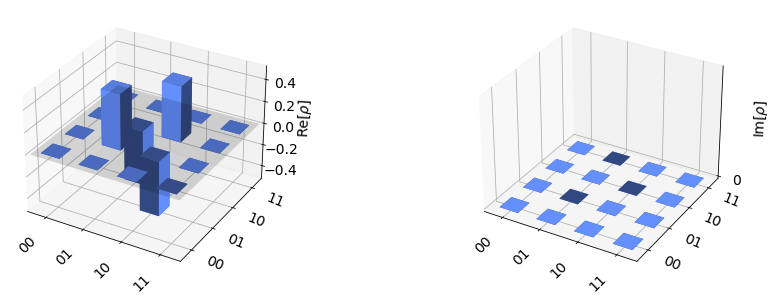

In [88]:
from qiskit.visualization import plot_state_city
plot_state_city(Singlet_statevector)

#### 2.3.2: Finding the Purity of a Singlet state: 

We can use the state vector or the density matrix:

In [52]:
## finding purity given the statevector
Singlet_statevector.purity()

0.9999999999999996

In [53]:
## finding purity given the density matrix:

In [54]:
My_Singlet_density_matrix.purity()

(0.9999999999999996+0j)

#### Obviously this shows that the Singlet state is a pure state since it has a purity of 1

#### 2.3.3: Finding reduced density matrices by tracing out subsystems: 

In [64]:
from qiskit.aqua.utils import get_subsystem_density_matrix

In [70]:
Singlet_reduced_density_matrix_array = get_subsystem_density_matrix(Singlet_statevector_array,[1])
Singlet_reduced_density_matrix_array

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j]])

In [72]:
Singlet_reduced_density_matrix = DensityMatrix(Singlet_reduced_density_matrix_array)
Singlet_reduced_density_matrix

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))

In [73]:
Singlet_reduced_density_matrix.purity()

(0.4999999999999998+0j)

#### This shows that the reduced density matrix of The singlet is MAXIMALLY MIXED with a Purity = I/2

## 3. GHZ STATE

In [83]:
qr_1 = QuantumRegister(4, 'q')
cr_1 = ClassicalRegister(4, 'c')
circuit_1 = QuantumCircuit(qr_1, cr_1)

circuit_1.h(qr_1[0])
circuit_1.cx(qr_1[0], qr_1[1])
circuit_1.cx(qr_1[1], qr_1[2])
circuit_1.cx(qr_1[2], qr_1[3])
circuit_1.barrier()
circuit_1.measure(qr_1[0], cr_1[0])
circuit_1.measure(qr_1[1], cr_1[1])
circuit_1.measure(qr_1[2], cr_1[2])
circuit_1.measure(qr_1[3], cr_1[3])

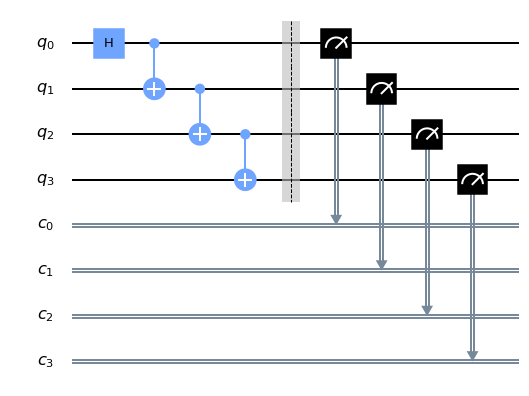

In [84]:
circuit_1.draw(output='mpl',cregbundle=False)